In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def gauss_pdf(mean, sd, x):
    pdf = (1/sd*np.sqrt(2*np.pi))*np.exp((-1/2)*((x-mean)/sd)**2)
    return pdf

In [3]:
def length_dict(df, mean, sd):
    '''
    create a len_dt, storing the count for each length
    '''
    len_dt = {}
    for i in range(mean, (mean + 2*sd)+1):
        len_dt[i] = df[df.full_length == i]['copies'].sum()
    total_reads = sum(len_dt.values()) * 2

    return len_dt, total_reads

In [4]:
def normal_distribution(mean, sd, len_dt, total_reads):
    '''
    produce a normal distribution that includes mean + 2sd counts
    '''
    keep_going = True

    while keep_going is True:
        keep_going = False
        print(total_reads)
        draw_ls = np.random.normal(loc=mean,scale=sd,size=total_reads)
        draw_ls = [round(i) for i in draw_ls]
        for i, len_count in len_dt.items():
            if len_count > draw_ls.count(i):
                total_reads = round(total_reads*1.1)
                keep_going = True
                break

    return draw_ls

def draw_dict(df, draw_ls):
    '''
    create a dictionary of draw numbers
    '''
    draw_dt = {}

    for i in range(min(draw_ls), max(draw_ls)+1):
        draw_counts = draw_ls.count(i)
        data_counts = df[df.full_length == i]['copies'].sum()
        draw_dt[i] = min(draw_counts, data_counts)

    return draw_dt


def draw_reads(df, col_names, draw_dt):
    '''
    for each fragment length, randomly draw reads
    '''
    sampled_df = pd.DataFrame(columns=col_names)
    counts = []

    for length, draws in draw_dt.items():
        tmp_df = df.loc[df['full_length'] == length]
        if len(tmp_df) == 0:
            continue
        indices = [i for i in range(len(tmp_df))]
        sampled_idx = random.choices(indices, k=draws)
        counts += [sampled_idx.count(idx) for idx in indices]
        sampled_df = pd.concat([sampled_df, tmp_df])

    sampled_df['counts'] = counts

    return sampled_df

In [5]:
dup_file = '/Users/ryankuster/github/readsynth/tests/test_project3/output/copies_GCF_000005845.2_ASM584v2_genomic.fna.csv'

mean = 358
sd = 100

df = pd.read_csv(dup_file)
col_names = [col for col in df.columns]

if len(df) == 0:
    sys.exit('no fragments produced with current settings')

modifier = 0

df['full_length'] = df['length'] + modifier
df.sort_values(['full_length'], ascending=[True], inplace=True)
df.reset_index(inplace=True, drop=True)

len_dt, total_reads = length_dict(df, 358, 100)

In [6]:
draw_ls = normal_distribution(mean, sd, len_dt, total_reads)

103730
114103
125513
138064
151870
167057
183763
202139
222353
244588
269047
295952
325547
358102
393912
433303
476633
524296
576726
634399
697839
767623
844385
928824


In [7]:
draw_dt = draw_dict(df, draw_ls)
sampled_df = draw_reads(df, col_names, draw_dt)

In [8]:
target = mean + (2*sd)
a = [len_dt[i] for i in range(target-10, target+1)]
sum(a)/len(a)

235.72727272727272

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

147390.34450607537


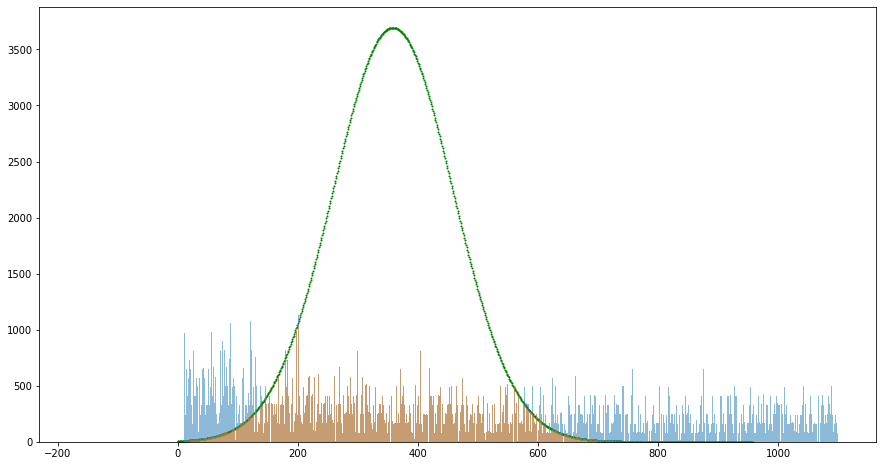

In [37]:
scale_by = 500/gauss_pdf(mean, sd, target)
print(scale_by)
xls, yls = [], []

for x in range(0, (mean+(6*sd))):
    xls.append(x)
    yls.append(gauss_pdf(mean, sd, x)* scale_by)

plt.hist(df['length'], weights=df['copies'], bins=(df['length'].max() - df['length'].min()), alpha=0.5)
# plt.hist(list(len_dt.keys()), weights=list(len_dt.values()), bins=(max(len_dt.keys())-min(len_dt.keys())), alpha=0.95, color='purple')
plt.hist(draw_dt.keys(), weights=draw_dt.values(), bins=(max(draw_dt.keys())-min(draw_dt.keys())), alpha=0.5)
plt.scatter(xls, yls, c="green",s=1)